# __Car sales analysis using a basic linear regression model__

- Car Sales Data for a basic Linear Regression model.
- We would like to predict the price of a used car depending on its specifications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## __Load the data__

In [2]:
data = pd.read_csv('datasets/car_sales.csv')
df = data.copy()
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.tail(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4335,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013,320
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


## __Inspect the data__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


##### __Observation:__

- `Price` and `EngineV` have missing values in the dataset.
- `Brand`, `Body`, `Engine Type`, `Registration` and `Model` are categorical variables.
- `Registration` does not seem to be of importance, so we will be dropping this variable.
- For the missing values in the `Price` column, we will impute the mean values based on the `Brand` and `Body` types.

In [6]:
df['EngineV'].max()

99.99

In [7]:
df['Registration'].value_counts()

Registration
yes    3947
no      398
Name: count, dtype: int64

In [8]:
df['Brand'].value_counts()

Brand
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: count, dtype: int64

In [9]:
df['Engine Type'].value_counts()

Engine Type
Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: count, dtype: int64

In [10]:
df['Model'].value_counts()

Model
E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: count, Length: 312, dtype: int64

In [11]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


##### __Observation:__

- Min. value of `Mileage` is showing as zero which is unlikely to happen for used cars, so we will be imputing the rows with with 0 mileage with the mean.
- `EngineV` has many noisy values which don't resemble the actual engine volumes, but for now we will not be dropping this variable.

## __Data cleaning and transformation__

In [12]:
df.shape

(4345, 9)

#### __Dropping the columns__

In [13]:
# Drop the `Registration` columns
if 'Registration' in df.columns:
    df.drop(['Registration'], axis=1, inplace=True)

In [14]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4


In [15]:
# Check for missing values
missing_values = df.isna().sum()
missing_values

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
Model            0
dtype: int64

#### __For the missing values in the `Price` column, we will impute the mean values based on the `Brand` and `Body` types.__

In [16]:
# Calculate the mean or average price for each group ('Body', 'Brand')
group_means = df.groupby(['Body', 'Brand'])['Price'].transform('mean')
group_means

0       16129.906414
1       18823.770588
2       23080.077135
3       39127.441781
4       34137.369384
            ...     
4340    23080.077135
4341    16129.906414
4342    16129.906414
4343    14078.361768
4344    12359.136846
Name: Price, Length: 4345, dtype: float64

In [17]:
# Fill missing values with the corresponding group means
df.fillna({'Price': group_means}, inplace=True)

#### __Drop the remaining missing values for `EngineV` column__

In [18]:
# Drop the remaining missing values
df.dropna(inplace=True)

#### __Cleaning duplicate values__

In [19]:
# Check for duplicate values
duplicate_values = df.duplicated().sum()
duplicate_values

73

In [20]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

#### __Updating 0 `Mileage` values with the mean__

In [21]:
df['Mileage'] = df['Mileage'].mask(df['Mileage'] == 0, df['Mileage'].mean())

In [22]:
df.describe()

,Price,Mileage,EngineV,Year
count,4122.000000,4122.000000,4122.000000,4122.000000
mean,19291.770258,168.787794,2.786742,2006.431829
std,24794.444767,98.710567,5.108975,6.702999
min,600.000000,1.000000,0.600000,1969.000000
25%,7000.000000,100.000000,1.800000,2003.000000
50%,11640.494624,162.746967,2.200000,2008.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### __Reset the indices after data cleaning__

In [23]:
df.reset_index(inplace = True, drop = True)

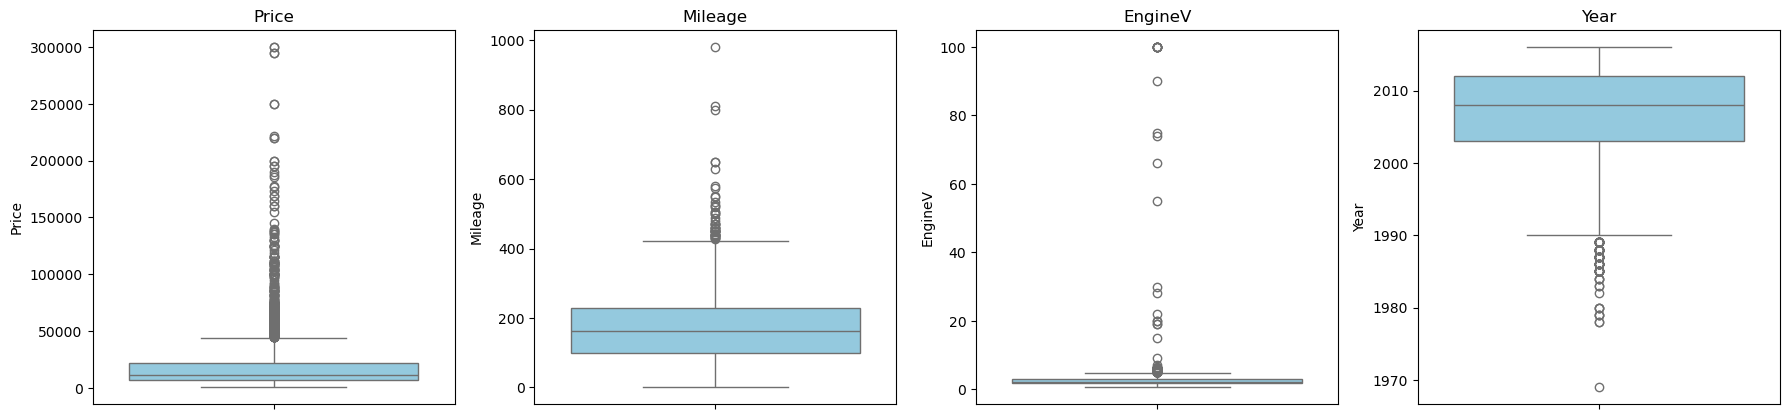

In [24]:
# Generate box plots and histograms to gain insights into the distributions and identify outliers.

num_vars = ['Price', 'Mileage', 'EngineV', 'Year']

# Set figure size and layout
plt.figure(figsize=(18, 20))

# Loop and plot
for i, col in enumerate(num_vars, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y = df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

##### __Observation:__

- All the 4 features have outliers.


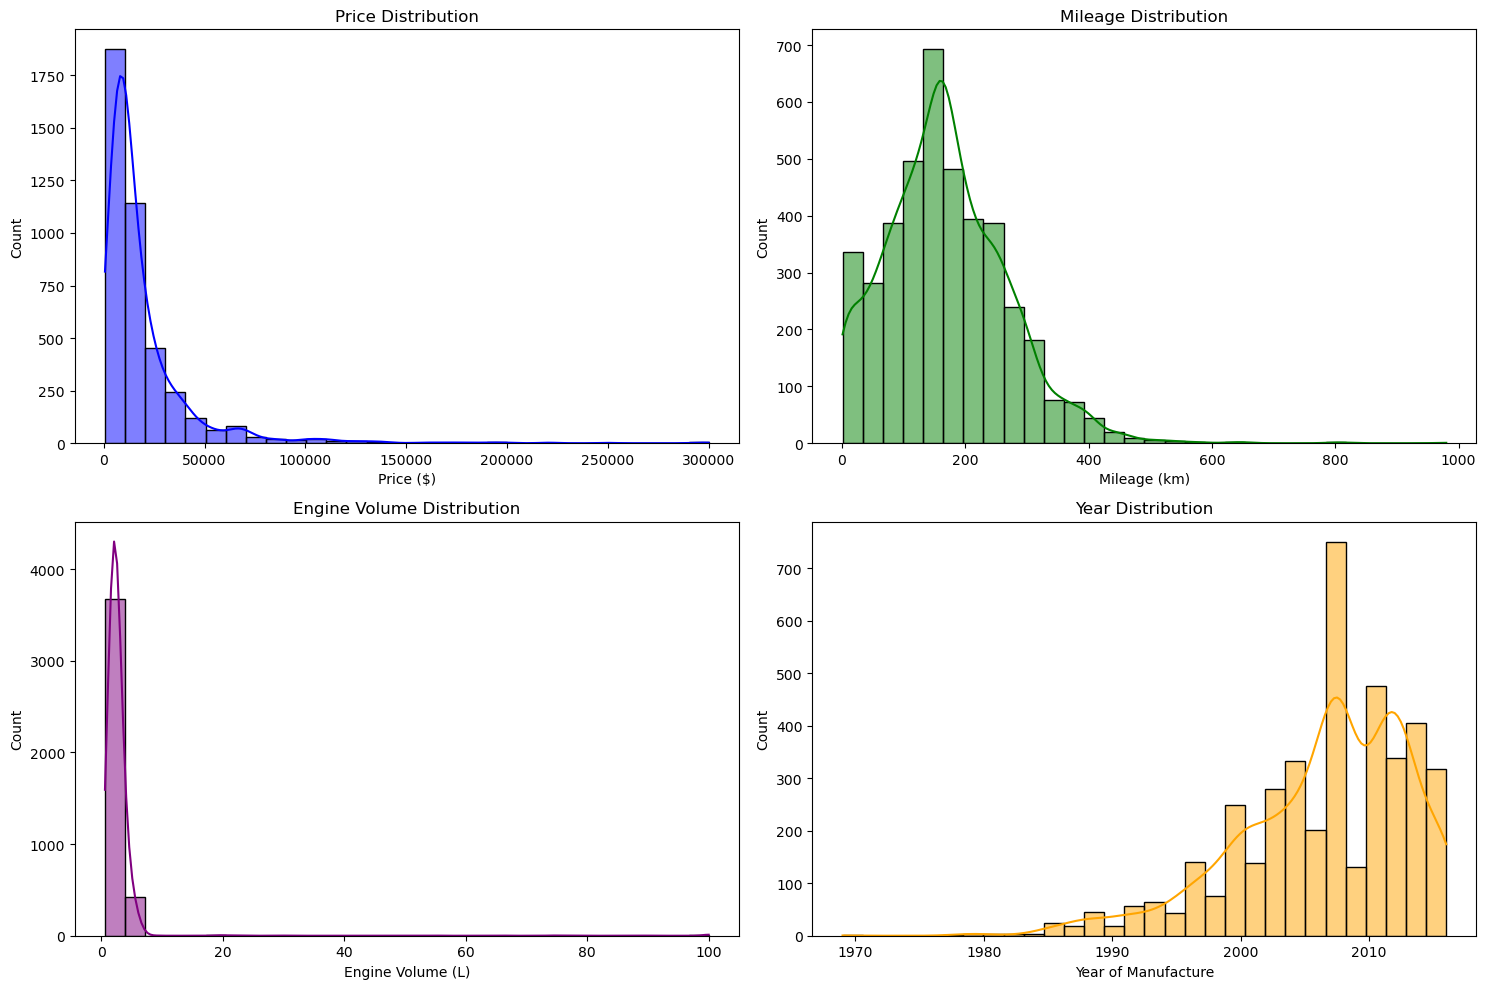

In [25]:
plt.figure(figsize=(15, 10))

# Univariate distributions
# Plot for Price
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')

# Plot for Mileage
plt.subplot(2, 2, 2)
sns.histplot(df['Mileage'], bins=30, kde=True, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage (km)')

# Plot for EngineV
plt.subplot(2, 2, 3)
sns.histplot(df['EngineV'], bins=30, kde=True, color='purple')
plt.title('Engine Volume Distribution')
plt.xlabel('Engine Volume (L)')

# Plot for Year
plt.subplot(2, 2, 4)
sns.histplot(df['Year'], bins=30, kde=True, color='orange')
plt.title('Year Distribution')
plt.xlabel('Year of Manufacture')

plt.tight_layout()
plt.show()

##### __Observation:__

- From the dist plots above, we can see that the columns `Mileage`, `EngineV`, `Year` and `Price` are not normally distributed.
- They exhibit exponential transformations.

#### __Checking the linearity of `Price` column with `Mileage`, `EngineV` and `Year`__

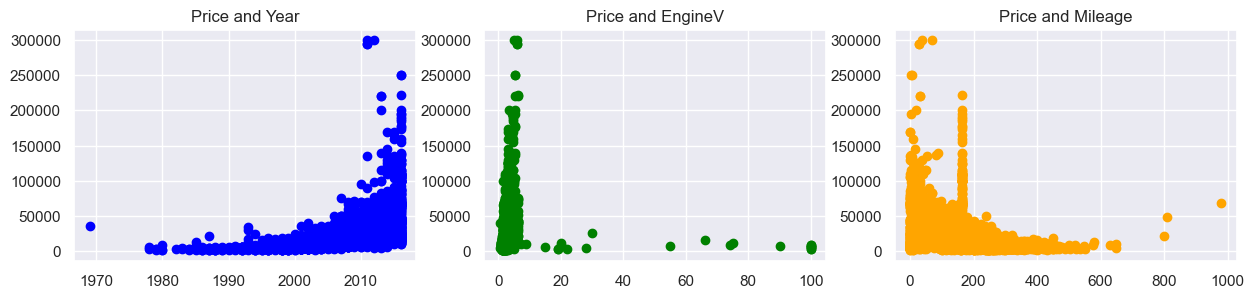

In [26]:
sns.set(style="darkgrid")

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))

ax1.scatter(df['Year'], df['Price'], color='blue')
ax1.set_title('Price and Year')

ax2.scatter(df['EngineV'], df['Price'], color='green')
ax2.set_title('Price and EngineV')

ax3.scatter(df['Mileage'], df['Price'], color='orange')
ax3.set_title('Price and Mileage')

plt.show()

##### __Observation:__

- From the scatter plots above, we can see that the three columns `Mileage`, `EngineV` and `Year` don't form a linear relationship with `Price`.
- Since `Price` exhibits exponential transformation, we can apply log transformation for the exponential relationships.

In [27]:
df['Log_Price'] = np.log(df['Price'])
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,Log_Price
0,BMW,4200.0,sedan,277.0,2.0,Petrol,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358.0,5.0,Gas,2003,S 500,9.495519
3,Audi,23000.0,crossover,240.0,4.2,Petrol,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
4117,Toyota,17900.0,sedan,35.0,1.6,Petrol,2014,Corolla,9.792556
4118,Mercedes-Benz,125000.0,sedan,9.0,3.0,Diesel,2014,S 350,11.736069
4119,BMW,6500.0,sedan,1.0,3.5,Petrol,1999,535,8.779557
4120,BMW,8000.0,sedan,194.0,2.0,Petrol,1985,520,8.987197


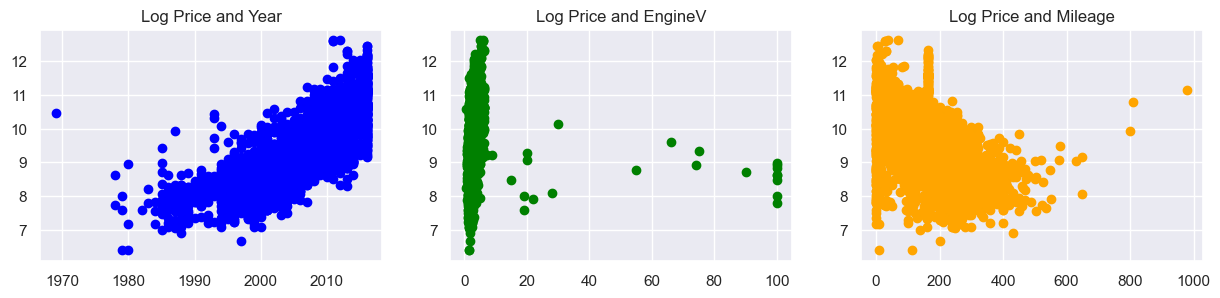

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))

ax1.scatter(df['Year'], df['Log_Price'], color='blue')
ax1.set_title('Log Price and Year')

ax2.scatter(df['EngineV'], df['Log_Price'], color='green')
ax2.set_title('Log Price and EngineV')

ax3.scatter(df['Mileage'], df['Log_Price'], color='orange')
ax3.set_title('Log Price and Mileage')

plt.show()

##### __Observation:__

- We can find a linear pattern in `Log Price and Year` but not in `EngineV` and `Mileage` because of the presence of outliers.

#### __Checking multicollinearity within the numerical columns__

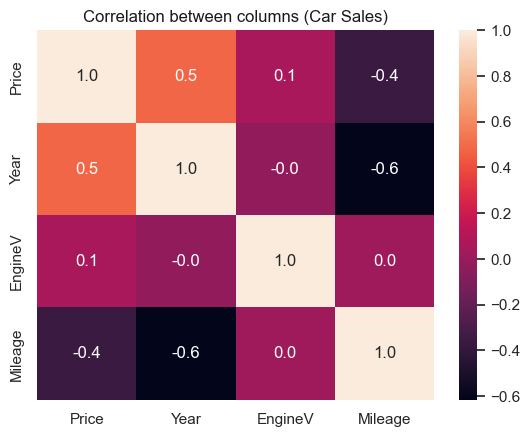

In [29]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = df[['Price', 'Year', 'EngineV', 'Mileage']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title("Correlation between columns (Car Sales)", c="k")
plt.show()

#### __Creating dummy variables for categorical data__

In [30]:
if 'Brand' in df.columns:
    df_dummies = pd.get_dummies(df, columns=['Brand', 'Body', 'Engine Type'], drop_first=True, dtype=np.int8)

In [31]:
df_dummies.head()

,Price,Mileage,EngineV,Year,Model,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277.0,2.0,1991,320,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427.0,2.9,1999,Sprinter 212,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358.0,5.0,2003,S 500,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240.0,4.2,2007,Q7,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120.0,2.0,2011,Rav 4,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## __Data Analysis__

### __Which brands launched how many new car models in each year.__

- We will check the car models that were launched by each brand in each respective year.
- A new model will be one that is launched in the current year.

In [32]:
years = df['Year'].unique()
years.sort()
years

array([1969, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [33]:
df[df['Year'] == 2014][['Model', 'Brand', 'Year']].groupby(["Brand", "Year"]).count()

,,Model
Brand,Year,
Audi,2014,15
BMW,2014,22
Mercedes-Benz,2014,35
Mitsubishi,2014,4
Renault,2014,14
Toyota,2014,30
Volkswagen,2014,33


In [34]:
# Finding the count of `Model` launched by each `Brand` per respective year
for yr in years:
    df1 = df[df['Year'] == yr][['Model', 'Brand', 'Year']].groupby(["Brand", "Year"]).count()
    # print(df1)

In [35]:
# No. of car `Models` released before 2000 per `Brand`
df_before_2000 = df[df['Year'] < 2000].groupby("Brand")['Year'].count()

# No. of car `Models` released after 2000 per `Brand`
df_after_2000 = df[df['Year'] >= 2000].groupby("Brand")['Year'].count()

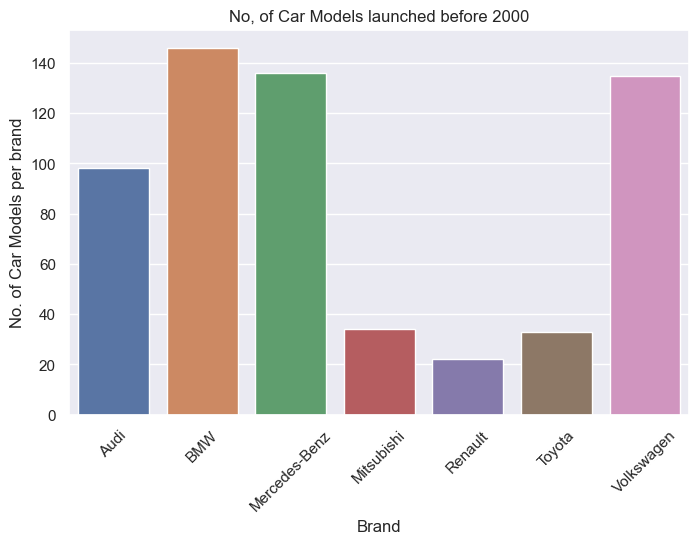

In [36]:
plt.figure(figsize=(8, 5))

sns.barplot(x=df_before_2000.index, y=df_before_2000.values, hue=df_before_2000.index)
plt.xlabel('Brand')
plt.ylabel('No. of Car Models per brand')
plt.title('No, of Car Models launched before 2000')
plt.xticks(rotation=45)

plt.show()

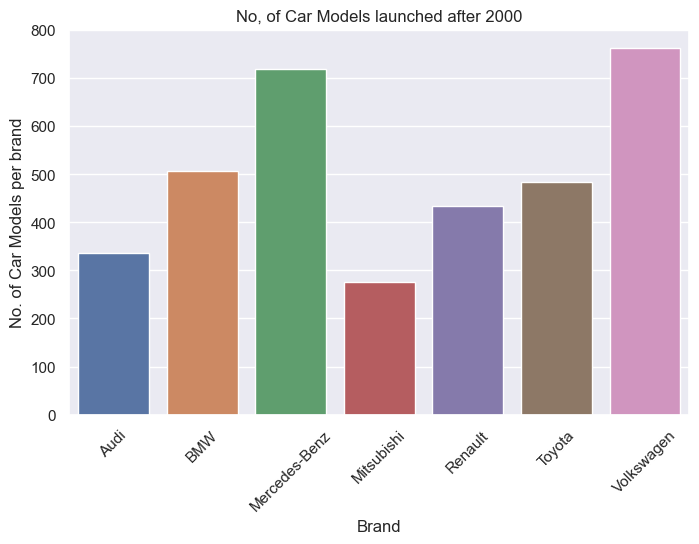

In [37]:
plt.figure(figsize=(8, 5))

sns.barplot(x=df_after_2000.index, y=df_after_2000.values, hue=df_after_2000.index)
plt.xlabel('Brand')
plt.ylabel('No. of Car Models per brand')
plt.title('No, of Car Models launched after 2000')
plt.xticks(rotation=45)

plt.show()

## __Linear Regression model__

In [39]:
df_dummies

,Price,Mileage,EngineV,Year,Model,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277.0,2.0,1991,320,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427.0,2.9,1999,Sprinter 212,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358.0,5.0,2003,S 500,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240.0,4.2,2007,Q7,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120.0,2.0,2011,Rav 4,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,17900.0,35.0,1.6,2014,Corolla,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4118,125000.0,9.0,3.0,2014,S 350,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4119,6500.0,1.0,3.5,1999,535,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4120,8000.0,194.0,2.0,1985,520,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [47]:
# Extract the feature(s) from the DataFrame (X)
X = df_dummies.drop(columns=['Model', 'Price', 'Log_Price'])

# Extract the target variable from the DataFrame (y)
y = df['Log_Price']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# Standardize the training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
# R-squared value
lin_reg.score(X_train,y_train)

0.742966213139205

In [54]:
# Coefficients Slope of the line
lin_reg.coef_

array([-0.07143142,  0.01003798,  0.60199891,  0.03900769,  0.10811944,
       -0.14260157, -0.20671049, -0.04879884, -0.09372583, -0.18828365,
       -0.11914299, -0.27251261, -0.20047973, -0.22686138,  0.02596694,
       -0.00779681,  0.03914657])

In [55]:
# Intercept
lin_reg.intercept_

9.399777314830745

In [59]:
lin_reg_df = pd.DataFrame({'Features': X.columns, 'Weights': lin_reg.coef_})
lin_reg_df

,Features,Weights
0,Mileage,-0.071431
1,EngineV,0.010038
2,Year,0.601999
3,Brand_BMW,0.039008
4,Brand_Mercedes-Benz,0.108119
5,Brand_Mitsubishi,-0.142602
6,Brand_Renault,-0.206710
7,Brand_Toyota,-0.048799
8,Brand_Volkswagen,-0.093726
9,Body_hatch,-0.188284


In [60]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

##### __Observation (for continous variables):__

- A positive weight shows that as a feature increases in value, `Log_Price` or `Price` also increases.
- A negative weight shows that as a feature increases in value, `Log_Price` or `Price` decreases.

##### __Observation (for dummy variables):__

- We can see `Audi` was dropped from the dummy variables for `Brand`. So, `Audi` is the benchmark.
- A positive weight shows that the respective category(`Brand`) is more expensive that the benchmark `Audi`. e.g. (BMW, for this dataset)
- A negative weight shows that the respective category(`Brand`) is less expensive that the benchmark `Audi`. e.g. (Mitsubishi, for this dataset)

### __Finding the training and testing accuracy of the model__

In [61]:
y_train_pred = lin_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train)
print("Training Set R² Score:", r2_train)

Training Set Mean Squared Error: 0.21162970886012736
Training Set R² Score: 0.742966213139205


In [62]:
y_test_pred = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Test Set Mean Squared Error:", mse_test)
print("Test Set R² Score:", r2_test)

Test Set Mean Squared Error: 0.19637840044148533
Test Set R² Score: 0.7921231555147692
